In [1]:
import warnings

import pandas as pd
import numpy as np

from functions.loading import load_data

from functions.preprocessing import outliers_preprocess
from functions.training_pipeline import training_pipeline
from functions.models import xgboost_model, catboost_model, lgbm_model

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None


In [2]:
path_rawdata = 'data/raw_data/'
path_models = 'models/proprietary_data/'
path_Benchmark = 'Benchmark/'
path_results = 'results/proprietary_data/'
path_plot = path_results +'plot/'
path_intermediary = 'data/intermediary_data/proprietary_data/'
path_plot = 'results/proprietary_data/plot/'
# ,"CF3_log", "CF123_log"
targets = ["CF1_log","CF2_log","CF3_log", "CF123_log"]
models = {
        # "xgboost": xgboost_model,
        "catboost": catboost_model,
        "lgbm": lgbm_model,
}
training_parameters = {
    "seed":0,
    "n_iter":10,
    "extended_features": [
            "Revenue_log",
            "EMP_log",
            "Asset_log",
            "NPPE_log",
            "CapEx_log",
            "Age",
            "CapInten",
            "GMAR",
            "Leverage",
            "Price",
            "FuelIntensity",
            "FiscalYear",
            "ENEConsume_log",
            "ENEProduce_log",
            "INTAN_log",
            "AccuDep_log",
            "COGS_log",
        ],
    "selec_sect":["GICSSubInd", "GICSInd", "GICSGroup"],
    "cross_val": False,
}

use_weights= None
companies=True
Summary_Final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

In [3]:
preprocessed_dataset = load_data(path_rawdata, save=True)

In [4]:
preprocessed_dataset["CF1"] = preprocessed_dataset["CF1_merge"] 
preprocessed_dataset["CF2"] = preprocessed_dataset["CF2_merge"] 
preprocessed_dataset["CF3"] = preprocessed_dataset["CF3_merge"] 
preprocessed_dataset["CF123"] = preprocessed_dataset["CF123_merge"] 
preprocessed_dataset["CDP_CF2"] = preprocessed_dataset["CDP_CF2_location"]
preprocessed_dataset["country_sector"] = preprocessed_dataset["CountryHQ"].astype(str) + "_" + preprocessed_dataset["GICSSubInd"].astype(str)
# 50 sec
threshold_under=1.5
threshold_over=2.5
for target in ["CF1_merge", "CF2_merge", "CF3_merge", "CF123_merge"] : 
    preprocessed_dataset = outliers_preprocess(preprocessed_dataset, target, threshold_under=threshold_under, threshold_over=threshold_over)

CF1_log
Using pre created preprocessed files
preprocessing done


2023/08/30 15:52:32 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/30 15:52:43 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 230
Created version '230' of model 'catboost'.


modelisation done


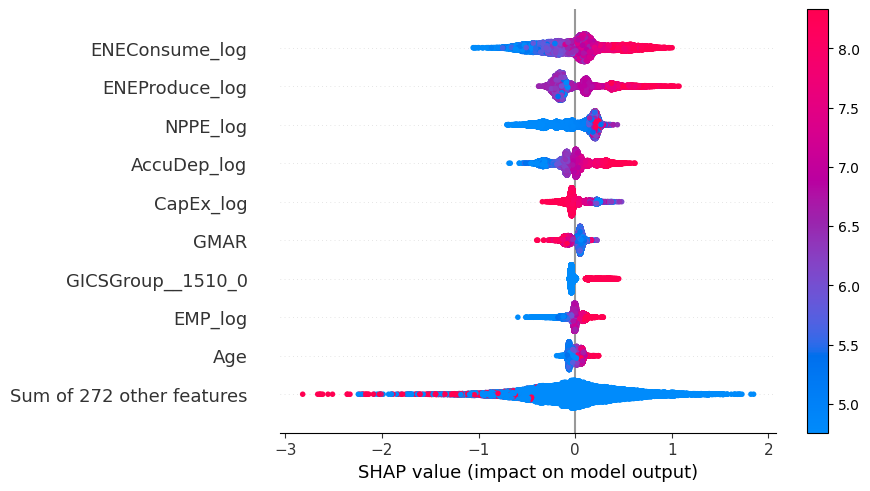

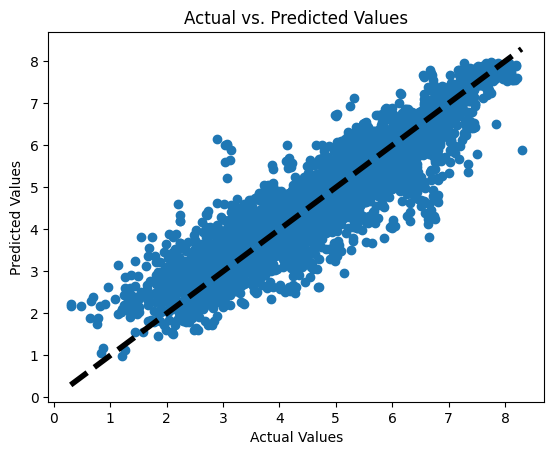

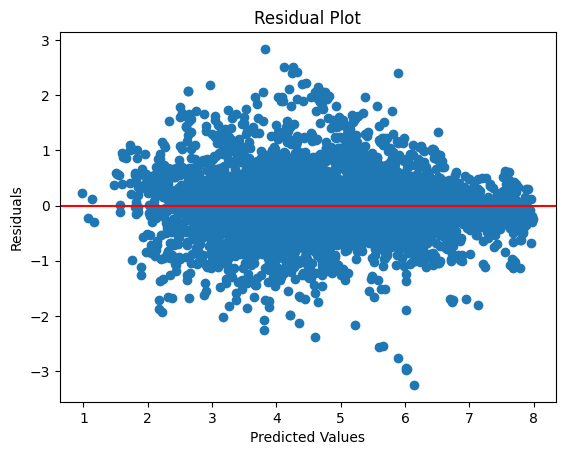

CF2_log
Using pre created preprocessed files
preprocessing done


2023/08/30 15:54:08 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/30 15:54:18 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 231
Created version '231' of model 'catboost'.


modelisation done


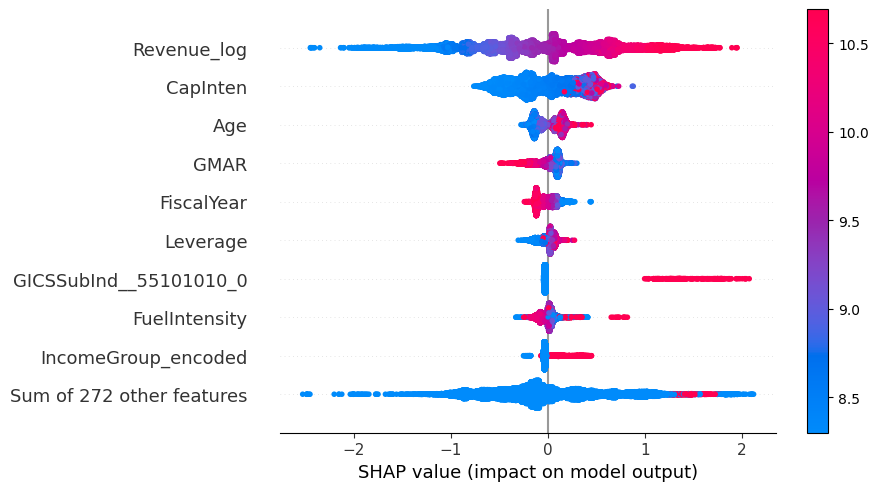

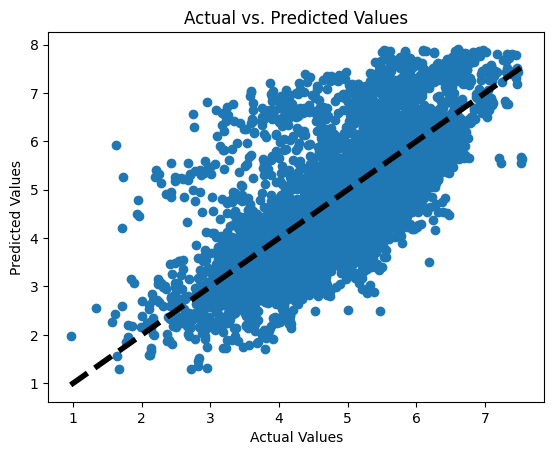

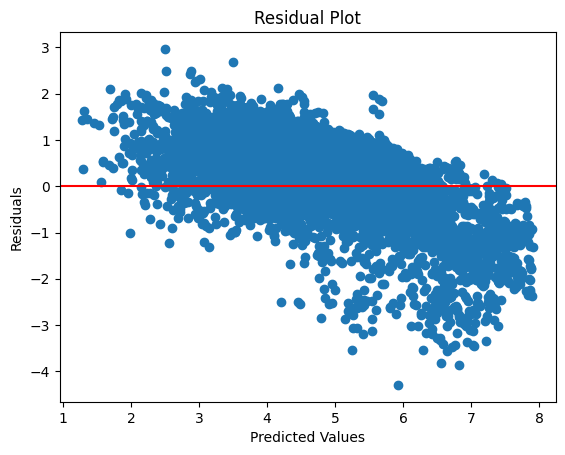

CF3_log
Using pre created preprocessed files
preprocessing done


2023/08/30 15:55:53 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/30 15:56:02 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 232
Created version '232' of model 'catboost'.


modelisation done


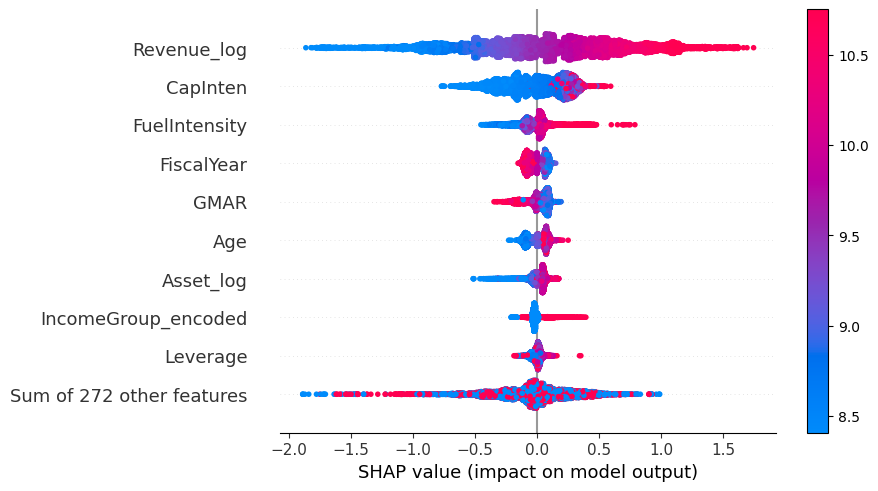

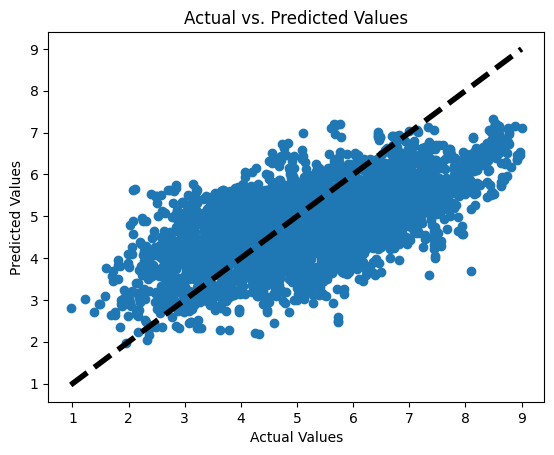

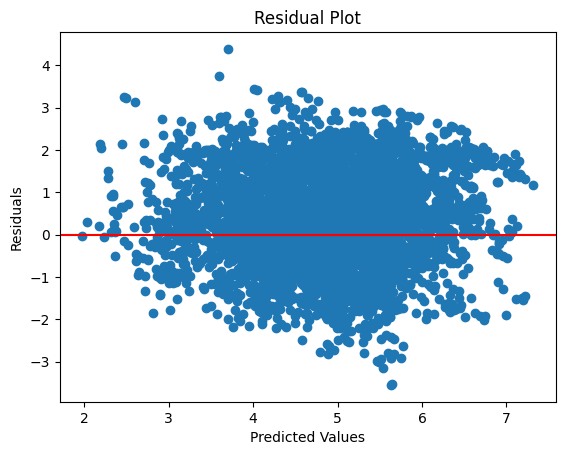

CF123_log
Using pre created preprocessed files
preprocessing done


2023/08/30 15:57:33 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/30 15:57:43 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 233
Created version '233' of model 'catboost'.


modelisation done


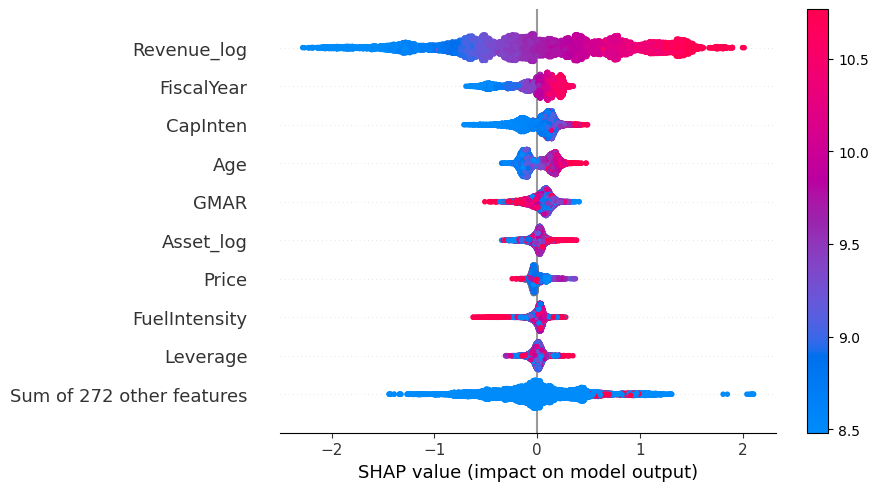

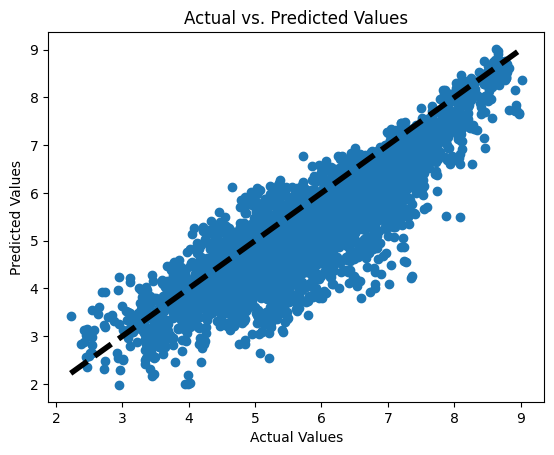

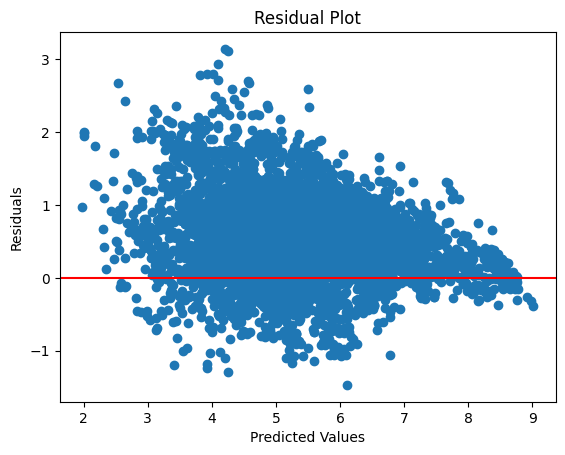

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# test de base  
targets = ["CF1_log","CF2_log","CF3_log", "CF123_log"]
models = {
        # "xgboost": xgboost_model,
        "catboost": catboost_model,
        # "lgbm": lgbm_model,
}
Summary_Final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []
use_weights = True
companies = False
custom_gradient = False
training_parameters["cross_val"] = False

best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    name_experiment="test_weights_save_5",
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    # Summary_Final_train=Summary_Final_train,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    open_data=True,
    save=True,
    use_weights=True,
    companies=False,
)

In [9]:
best_scores
# base 
# [0.5233991620098789, 0.40811509811421237, 0.85109105089482, 0.5229286278975259]

# weights company False
# [0.5210419733631437, 0.4159629294599453, 0.8637620192374258, 0.529039907808258]

# weights company True
# [0.5282566564237224, 0.4276567152521008,  0.8902519108927333, 0.5443683264545418]


[0.5202457313313701,
 0.4620362207641124,
 1.0119537341141227,
 0.7217236041553577]

In [35]:
summary_global

,Target,model,mae,mse,r2,rmse,mape,std
0,CF1_log,catboost,0.368237,0.273947,0.858347,0.523399,0.094276,0.084941
1,CF1_log,lgbm,0.370266,0.280179,0.855124,0.529319,0.093892,0.088528
2,CF2_log,catboost,0.288386,0.166558,0.825348,0.408115,0.064729,0.071094
3,CF2_log,lgbm,0.303318,0.182444,0.808689,0.427135,0.068125,0.070408
4,CF3_log,catboost,0.665080,0.724356,0.677323,0.851091,0.146878,0.067220
5,CF3_log,lgbm,0.686581,0.771974,0.656111,0.878620,0.151735,0.060190
6,CF123_log,catboost,0.389030,0.273454,0.819701,0.522929,0.071583,0.055137
7,CF123_log,lgbm,0.406691,0.295639,0.805073,0.543727,0.074839,0.047563
8,CF1_log,catboost,0.376385,0.279055,0.855705,0.528257,0.095420,0.084246
9,CF1_log,lgbm,0.393542,0.303734,0.842945,0.551120,0.099118,0.088842


# gradient tests

In [31]:
models = {
        # "xgboost": xgboost_model,
        # "catboost": catboost_model,
        "lgbm": lgbm_model,
}

In [5]:
# test 
targets = ["CF1_log","CF2_log","CF3_log", "CF123_log"]
use_weights=True
companies=False
custom_gradient = "L1" #, "L2"

best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    name_experiment="restriction_CF123_test_gradient_erty",
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    # Summary_Final_train=Summary_Final_train,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    open_data=False,
    save=False,
    use_weights=use_weights,
    companies=companies,
    custom_gradient=custom_gradient, # False, "L1", "L2"
)

CF1_log
Using pre created preprocessed files
preprocessing done
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "_catboost.pyx", line 1540, in _catboost._try_jit_method.new_method
  File "c:\Users\thibaud.barreau\AppData\Local\Programs\Python\Python39\lib\site-packages\numba\core\dispatcher.py", line 471, in _compile_for_args
    error_rewrite(e, 'unsupported_error')
  File "c:\Users\thibaud.barreau\AppData\Local\Programs\Python\Python39\lib\site-packages\numba\core\dispatcher.py", line 409, in error_rewrite
    raise e.with_traceback(None)
numba.core.errors.UnsupportedError: Failed in nopython mode pipeline (step: inline calls to locally defined closures)
The use of yield in a closure is unsupported.

File "functions\models.py", line 310:
    def calc_ders_range(self, approxes, targets, weights):
        <source elided>
        der1, der2 = (
            weights * np.array([np.sign(targets[i] - approxes[i] for i in range(len(targets)))]),
            ^


During handling of the above exception, another exception occurred:

Traceback (most recent call las

In [6]:
best_scores
# weights : [0.5210419733631437, 0.4159629294599453, 0.8637620192374258, 0.529039907808258]
# weithts slight differance, cant explain why : [0.5204469702378566, 0.4065862754564264, 0.8695668764144385, 0.5317033406354882]

[0.5204469702378566,
 0.4065862754564264,
 0.8695668764144385,
 0.5317033406354882]

# test forbes

In [8]:
training_parameters["extended_features"] = ["Revenue_log", "Asset_log", "EBIT_log"]
training_parameters["selec_sect"] = ["GICSSubInd"]

Summary_Final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

path_rawdata = 'data/raw_data/'
path_models = 'models/open_data/'
path_Benchmark = 'Benchmark/'
path_results = 'results/open_data/'
path_plot = path_results +'plot/'
path_intermediary = 'data/intermediary_data/open_data/'
path_plot = 'results/open_data/plot/'

In [12]:
# test 


targets = ["CF1_log", "CF2_log","CF3_log", "CF123_log"]
use_weights = True
companies = True
custom_gradient = False
training_parameters["cross_val"] = False
open_data = True
save=False

best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    name_experiment="open_data_weights_1",
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    open_data=open_data,
    save=save,
    use_weights=use_weights,
    companies=companies,
    custom_gradient=custom_gradient, # False, "L1", "L2"
)

CF1_log
Using pre created preprocessed files
preprocessing done


2023/08/28 19:01:31 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/28 19:01:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 157
Created version '157' of model 'catboost'.
2023/08/28 19:01:44 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/28 19:01:53 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 157
Created version '157' of model 'lgbm'.


modelisation done
CF2_log
Using pre created preprocessed files
preprocessing done


2023/08/28 19:02:12 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/28 19:02:23 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 158
Created version '158' of model 'catboost'.
2023/08/28 19:02:24 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/28 19:02:32 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 158
Created version '158' of model 'lgbm'.


modelisation done
CF3_log
Using pre created preprocessed files
preprocessing done


2023/08/28 19:02:41 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/28 19:02:48 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 159
Created version '159' of model 'catboost'.
2023/08/28 19:02:49 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/28 19:02:56 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 159
Created version '159' of model 'lgbm'.


modelisation done
CF123_log
Using pre created preprocessed files
preprocessing done


2023/08/28 19:03:08 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/28 19:03:17 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 160
Created version '160' of model 'catboost'.
2023/08/28 19:03:17 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/28 19:03:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 160


modelisation done


Created version '160' of model 'lgbm'.


In [13]:
best_scores
# company False [0.5942981807446742, 0.5199290731203127, 0.9205291544461597, 0.5697513017958337]
# company True  [0.6181115374952726, 0.5282881561064796, 0.948884930076248, 0.5847361763342059]

[0.6181115374952726, 0.5282881561064796, 0.948884930076248, 0.5847361763342059]

In [16]:
best_stds
# company False [0.08536605849280941, 0.09252645566960702, 0.06459487990827643, 0.0628031625458782]
# company True  [0.09245682274663633, 0.09295838272001448, 0.06866365947788611, 0.06217860674351541]

[0.09245682274663633,
 0.09295838272001448,
 0.06866365947788611,
 0.06217860674351541]

In [ ]:
summary_global